# Project: Analyzing TMDB Movies 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this data set we will be analyzing data contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Question(s) for Analysis
>**Q.1**: What is the top most profitable movies?.

>**Q.2**: Which genres are most popular from year to year?


**Importing libraries**

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [58]:
def plotting(dataframe,ry,g,p):
    genres_count =dataframe.groupby([ry,g], as_index=False)[p].mean()
    x = genres_count.groupby(ry).agg({p:'max'})
    new = genres_count.merge(x, how='inner', right_on=p, left_on=p)
    sns.scatterplot(x=ry, y=p, hue=g,data=new)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

**Reading the dataset**

In [59]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [60]:
df.shape

(10866, 21)

**Summury statistics**

In [61]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning

 

**Removing the unneccessary columns and checking**

In [63]:
df.drop(["id","imdb_id","homepage","tagline","keywords","overview","release_date","vote_count","vote_average","budget_adj","revenue_adj"],axis = 1, inplace = True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015


**Handling missing data and duplicates**

In [64]:
print("Lenght of data before cleaning: " , len(df))
print(df.info())
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
print("Lenght of data after cleaning: " , len(df))


Lenght of data before cleaning:  10866
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_year          10866 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 849.0+ KB
None
Lenght of data after cleaning:  9772


<a id='eda'></a>
## Exploratory Data Analysis


### What is the most profitable movies?

In [65]:
df['net_profit'] = df['revenue'] - df['budget']
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_year,net_profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,228436354
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,1316249360


In [66]:
profit = df.groupby(['original_title','budget','revenue', 'popularity'])['net_profit'].sum().reset_index().sort_values(by='net_profit', ascending=False)[:10]
print(profit)

                                    original_title     budget     revenue  \
755                                         Avatar  237000000  2781505847   
6778                  Star Wars: The Force Awakens  200000000  2068178225   
9005                                       Titanic  200000000  1845034188   
4099                                Jurassic World  150000000  1513528810   
2983                                     Furious 7  190000000  1506249360   
7211                                  The Avengers  220000000  1519557910   
3336  Harry Potter and the Deathly Hallows: Part 2  125000000  1327817822   
757                        Avengers: Age of Ultron  280000000  1405035767   
2965                                        Frozen  150000000  1274219009   
8269                                       The Net   22000000  1106279658   

      popularity  net_profit  
755     9.432768  2544505847  
6778   11.173104  1868178225  
9005    4.355219  1645034188  
4099   32.985763  1363528810

**Weak positive correlation**

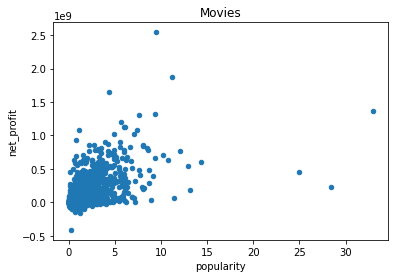

In [67]:
profit = df.groupby(['original_title','budget','revenue', 'popularity'])['net_profit'].sum().reset_index().sort_values(by='net_profit', ascending=False)[:]
profit.plot(x="popularity", y="net_profit", kind="scatter");
plt.title('Movies');


**For budget we see that it is almost symmetric and for the rest -Revenue, popularity and net profit- the histograms skewed to the right**

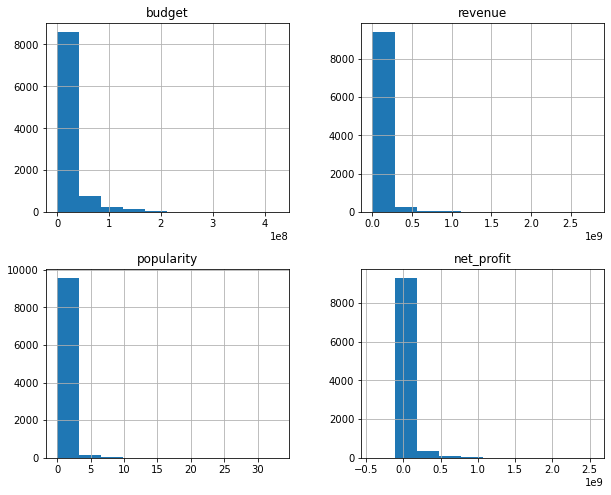

In [68]:
profit.hist(figsize=(10,8));

### Most genres popular from year to year

In [69]:
#question2: Which genres are most popular from year to year?
dfq2=df
# split the genres string
dfq2['genres'] = dfq2['genres'].astype(str).str.split('|')
# create genre list( create each row for each gen) using explode 
dfq2 = dfq2.explode('genres')
# tidy up the data by removing extra row index by reset index
data2 = dfq2.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1).reset_index(level=0, drop=True)
# change the pandas series to pandas dataframe
data2 = data2.reset_index()
print(data2)

    release_year           genres  popularity
0           1960         Thriller    0.811910
1           1961        Animation    2.631987
2           1962        Adventure    0.942513
3           1963        Animation    2.180410
4           1964              War    0.930959
5           1965            Music    0.968850
6           1966        Animation    0.751857
7           1967        Animation    2.550704
8           1968          Mystery    1.519456
9           1969            Crime    0.948020
10          1970        Animation    1.127719
11          1971           Family    1.530722
12          1972            Crime    1.226152
13          1973        Animation    0.956526
14          1974          Mystery    0.702035
15          1975        Adventure    0.880297
16          1976            Crime    0.707249
17          1977  Science Fiction    1.508652
18          1978            Music    0.679805
19          1979           Action    1.410014
20          1980  Science Fiction 

***plt.title('The Most Popular Genre of Each Year')
plt.xlabel('Release Year')
plt.ylabel('Popularity')***

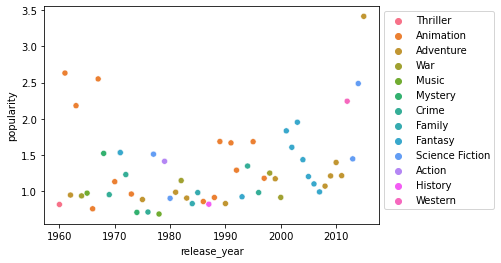

In [70]:
plotting(dfq2,'release_year','genres','popularity')



<a id='conclusions'></a>
## Conclusions

> For this dataset we firstly tried found the most 10 profitable movies then we wanted to know if there is a battern for net profit associated with popularity by making a line graph, by looking at it we find a weak positive correlation.


> Secondly we show which genres are most popular from year to year and by looking at the scatter plot we found that that there is no gener dominating over all time but we can say adventure popularity increased by time until it become the highest over all in 2015.

>**Limitations:**

>-Data was not 100 % accurate, there were null values we had to get rid of to do the analysis properly, in some features it reached 1000 value which is 10% of the data set, we know that it won't affect the analysis highly due it small % compared to the total daata sum yet it shows that our analysis won't be 100% accurate.

>-The analysis we have done is subjected to the source we gathered the data from which means it is not the absolute truth, also the ratings itself are kind of subjective and, keeping that in mind we know that our analysis is just a start point to make more investigation or if we are going to take serious actions we must keep this point in mind.

>-The data we are using is only updated to 2015, that means alot have changed, it should not be considered to take actions in 2022.

In [71]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1